In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import shap
import socket
import matplotlib.pyplot as plt
from tqdm import tqdm

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns
import os
import gc
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [5]:
df = pd.read_csv("../data/raw/CIC_IoMT_2024_WiFi_MQTT_train.csv")

In [6]:
df.sample(5)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
4563292,0.00,1.00,75.44,2251.975300,2251.975300,0,0.0,0.00,0.0,0.0,...,0.0000,42.0,84696936.0,9.5,9.164,0.00000,0.000000,0.00,141.5,TCP_IP-DDoS-ICMP8_train
853042,0.00,1.00,64.00,165.832090,165.832090,0,0.0,0.00,0.0,0.0,...,0.0000,42.0,84697010.0,9.5,9.164,0.00000,0.000000,0.00,141.5,TCP_IP-DDoS-ICMP3_train
5704470,24802.98,16.89,63.84,3250.406000,3250.406000,0,0.0,0.01,0.0,0.0,...,0.0353,50.1,84675304.0,9.5,10.000,0.05054,0.063823,0.02,141.5,TCP_IP-DoS-UDP1_train
4735010,0.00,1.00,64.00,4.140089,4.140089,0,0.0,0.00,0.0,0.0,...,0.0000,42.0,84696936.0,9.5,9.164,0.00000,0.000000,0.00,141.5,TCP_IP-DDoS-ICMP8_train
6957200,54.00,6.00,64.00,82.051410,82.051410,0,0.0,0.00,0.0,0.0,...,0.0000,54.0,84696130.0,9.5,10.390,0.00000,0.000000,0.00,141.5,TCP_IP-DDoS-TCP3_train


In [7]:
df.shape

(7160831, 46)

In [8]:
df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7160831.0,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,...,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06
mean,2.958836e+04,8.042994e+00,6.474652e+01,1.523202e+04,1.523202e+04,0.0,5.079549e-03,1.587609e-01,3.862139e-02,2.240655e-02,...,6.083873e+01,6.405736e+00,6.084030e+01,8.468349e+07,9.499081e+00,1.044928e+01,9.047365e+00,2.535226e+03,9.148464e-02,1.414795e+02
std,2.762618e+05,6.292249e+00,8.405145e+00,3.950968e+04,3.950968e+04,0.0,3.411170e-02,3.388233e-01,1.371016e-01,9.713146e-02,...,8.809639e+01,3.917352e+01,8.787611e+01,1.788442e+07,8.446717e-01,3.169333e+00,5.538150e+01,2.045832e+04,2.327133e-01,2.174133e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,-1.282061e+00,1.000000e+00,9.164000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.400000e+01,1.160000e+00,6.400000e+01,6.685014e+00,6.685014e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.234000e+01,0.000000e+00,4.260000e+01,8.467888e+07,9.500000e+00,9.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
50%,1.080000e+02,6.000000e+00,6.400000e+01,1.452887e+02,1.452887e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.469641e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
75%,1.958050e+04,1.700000e+01,6.400000e+01,1.914681e+04,1.914681e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.469686e+07,9.500000e+00,1.039000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
max,9.895636e+06,1.700000e+01,2.550000e+02,2.097152e+06,2.097152e+06,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.514000e+03,7.210000e+02,1.514000e+03,1.694694e+08,1.500000e+01,5.503000e+01,1.020000e+03,5.204379e+05,1.000000e+00,2.446000e+02


In [9]:
df['label'].unique()

array(['TCP_IP-DDoS-UDP2_train', 'TCP_IP-DDoS-UDP4_train',
       'TCP_IP-DDoS-ICMP6_train', 'TCP_IP-DoS-SYN2_train',
       'TCP_IP-DDoS-ICMP3_train', 'TCP_IP-DDoS-ICMP1_train',
       'TCP_IP-DDoS-UDP8_train', 'TCP_IP-DDoS-UDP1_train',
       'MQTT-DoS-Connect_Flood_train', 'MQTT-DDoS-Publish_Flood_train',
       'TCP_IP-DDoS-ICMP5_train', 'TCP_IP-DDoS-SYN3_train',
       'MQTT-DDoS-Connect_Flood_train', 'TCP_IP-DDoS-UDP3_train',
       'TCP_IP-DDoS-TCP2_train', 'MQTT-DoS-Publish_Flood_train',
       'TCP_IP-DoS-TCP3_train', 'TCP_IP-DoS-UDP3_train',
       'TCP_IP-DoS-ICMP3_train', 'TCP_IP-DDoS-SYN2_train',
       'TCP_IP-DDoS-UDP6_train', 'TCP_IP-DDoS-ICMP2_train',
       'Benign_train', 'TCP_IP-DDoS-ICMP7_train', 'TCP_IP-DoS-SYN1_train',
       'TCP_IP-DoS-SYN4_train', 'TCP_IP-DDoS-TCP4_train',
       'Recon-OS_Scan_train', 'Recon-Ping_Sweep_train',
       'TCP_IP-DDoS-SYN1_train', 'Recon-VulScan_train',
       'TCP_IP-DDoS-ICMP8_train', 'TCP_IP-DoS-TCP1_train',
       'TCP_IP-DoS-

In [10]:
import pandas as pd
label_mapping = {
    'Benign': ['Benign_train'],
    
    'Spoofing': ['ARP_Spoofing_train'],

    'Reconnaissance': [
        'Recon-OS_Scan_train',
        'Recon-Ping_Sweep_train',
        'Recon-VulScan_train',
        'Recon-Port_Scan_train'
    ],
    
    'MQTT': [
        'MQTT-Malformed_Data_train',
        'MQTT-DoS-Connect_Flood_train',
        'MQTT-DDoS-Publish_Flood_train',
        'MQTT-DoS-Publish_Flood_train',
        'MQTT-DDoS-Connect_Flood_train'
    ],

    'DoS': [
        'TCP_IP-DoS-TCP1_train', 'TCP_IP-DoS-TCP2_train', 'TCP_IP-DoS-TCP3_train', 'TCP_IP-DoS-TCP4_train',
        'TCP_IP-DoS-UDP1_train', 'TCP_IP-DoS-UDP2_train', 'TCP_IP-DoS-UDP3_train', 'TCP_IP-DoS-UDP4_train',
        'TCP_IP-DoS-ICMP1_train', 'TCP_IP-DoS-ICMP2_train', 'TCP_IP-DoS-ICMP3_train', 'TCP_IP-DoS-ICMP4_train',
        'TCP_IP-DoS-SYN1_train', 'TCP_IP-DoS-SYN2_train', 'TCP_IP-DoS-SYN3_train', 'TCP_IP-DoS-SYN4_train'
    ],

    'DDoS': [
        'TCP_IP-DDoS-TCP1_train', 'TCP_IP-DDoS-TCP2_train', 'TCP_IP-DDoS-TCP3_train', 'TCP_IP-DDoS-TCP4_train',
        'TCP_IP-DDoS-UDP1_train', 'TCP_IP-DDoS-UDP2_train', 'TCP_IP-DDoS-UDP3_train', 'TCP_IP-DDoS-UDP4_train',
        'TCP_IP-DDoS-UDP5_train', 'TCP_IP-DDoS-UDP6_train', 'TCP_IP-DDoS-UDP7_train', 'TCP_IP-DDoS-UDP8_train',
        'TCP_IP-DDoS-ICMP1_train', 'TCP_IP-DDoS-ICMP2_train', 'TCP_IP-DDoS-ICMP3_train', 'TCP_IP-DDoS-ICMP4_train',
        'TCP_IP-DDoS-ICMP5_train', 'TCP_IP-DDoS-ICMP6_train', 'TCP_IP-DDoS-ICMP7_train', 'TCP_IP-DDoS-ICMP8_train',
        'TCP_IP-DDoS-SYN1_train', 'TCP_IP-DDoS-SYN2_train', 'TCP_IP-DDoS-SYN3_train', 'TCP_IP-DDoS-SYN4_train'
    ]
}

In [11]:
def map_category(label):
    for parent, sub_labels in label_mapping.items():
        if label in sub_labels:
            return parent
    return 'Unknown'
df['SuperClass'] = df['label'].apply(map_category)

In [12]:
grouped = df.groupby(['SuperClass', 'label']).size().reset_index(name='Records')
total = len(df)
grouped['Percentage'] = (grouped['Records'] / total) * 100

summary = grouped.groupby('SuperClass')['Records'].sum().reset_index()
summary['Percentage'] = (summary['Records'] / total) * 100

print("Hierarchical Breakdown:")
display(grouped.sort_values(['SuperClass', 'Records'], ascending=[True, False]).head(20))

print("Category Summary:")
display(summary)

Hierarchical Breakdown:


,SuperClass,label,Records,Percentage
0,Benign,Benign_train,192732,2.691475
18,DDoS,TCP_IP-DDoS-UDP2_train,207295,2.894846
19,DDoS,TCP_IP-DDoS-UDP3_train,206604,2.885196
20,DDoS,TCP_IP-DDoS-UDP4_train,206343,2.881551
17,DDoS,TCP_IP-DDoS-UDP1_train,206170,2.879135
21,DDoS,TCP_IP-DDoS-UDP5_train,205507,2.869876
24,DDoS,TCP_IP-DDoS-UDP8_train,204105,2.850298
15,DDoS,TCP_IP-DDoS-TCP3_train,204075,2.849879
10,DDoS,TCP_IP-DDoS-SYN2_train,203669,2.844209
13,DDoS,TCP_IP-DDoS-TCP1_train,202311,2.825245


Category Summary:


,SuperClass,Records,Percentage
0,Benign,192732,2.691475
1,DDoS,4779859,66.750060
2,DoS,1805529,25.213959
3,MQTT,262938,3.671892
4,Reconnaissance,103726,1.448519
5,Spoofing,16047,0.224094


In [13]:
df.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
SuperClass         0
dtype: int64

Coping with class imbalance severity here..

Preprocessing pipeline:

In [14]:
ID_COLS = ['label', 'SuperClass']

In [15]:
DROP_COLS = ['Boot_Time_with_date', 'RTime', 'SrcAddr', 'DstAddr', 'SrcMac', 'DstMac', 'IMEI']

In [16]:
RATE_COLS = ['Rate', 'Srate', 'Drate'] 

In [17]:
TARGET_COUNTS = {
    'DDoS': 500_000,
    'DoS':  500_000,
    'Benign': 300_000,
    'MQTT': 300_000,
    'Reconnaissance': 200_000,
    'Spoofing': 200_000
}

In [18]:
cols_to_drop = [c for c in DROP_COLS if c in df.columns]
if cols_to_drop:
    print("Dropping ID/time columns:", cols_to_drop)
    df = df.drop(columns=cols_to_drop)

In [19]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,SuperClass
0,683.50,17.00,64.0,553148.440,553148.440,0,0.0,0.0,0.0,0.00,...,50.00,101635944.0,9.5,10.00,0.000,0.000000,0.00,141.5,TCP_IP-DDoS-UDP2_train,DDoS
1,1745.92,16.12,64.0,29919.545,29919.545,0,0.0,0.0,0.0,0.04,...,52.28,84696616.0,9.5,10.05,2.152,11.785338,0.23,141.5,TCP_IP-DDoS-UDP2_train,DDoS
2,2830.36,15.79,64.0,27075.605,27075.605,0,0.0,0.0,0.0,0.06,...,53.25,84696616.0,9.5,10.35,10.555,113.675460,0.53,141.5,TCP_IP-DDoS-UDP2_train,DDoS
3,4087.50,16.89,64.0,19660.156,19660.156,0,0.0,0.0,0.0,0.00,...,50.16,84696616.0,9.5,10.03,1.236,4.490081,0.18,141.5,TCP_IP-DDoS-UDP2_train,DDoS
4,3916.00,17.00,64.0,270322.780,270322.780,0,0.0,0.0,0.0,0.00,...,50.00,84696616.0,9.5,10.00,0.000,0.000000,0.00,141.5,TCP_IP-DDoS-UDP2_train,DDoS


In [20]:
df['SuperClass'].value_counts()

SuperClass
DDoS              4779859
DoS               1805529
MQTT               262938
Benign             192732
Reconnaissance     103726
Spoofing            16047
Name: count, dtype: int64

In [21]:
feature_cols = [c for c in df.columns if c not in ID_COLS]
print(f"Feature count: {len(feature_cols)}")

X_raw = df[feature_cols].copy()
y_raw = df['SuperClass'].copy()

Feature count: 45


In [22]:
non_numeric = [c for c in X_raw.columns if not np.issubdtype(X_raw[c].dtype, np.number)]
if non_numeric:
    print("Non-numeric columns detected - converting to numeric (if possible) or dropping:", non_numeric)
    for c in non_numeric:
        X_raw[c] = pd.to_numeric(X_raw[c], errors='coerce')
    non_numeric_after = [c for c in X_raw.columns if not np.issubdtype(X_raw[c].dtype, np.number)]
    if non_numeric_after:
        print("Dropping columns still non-numeric:", non_numeric_after)
        X_raw = X_raw.drop(columns=non_numeric_after)

In [23]:
rate_cols_present = [c for c in RATE_COLS if c in X_raw.columns]
if rate_cols_present:
    print("Applying MinMax normalization to rate cols:", rate_cols_present)
    mms = MinMaxScaler()
    X_raw[rate_cols_present] = mms.fit_transform(X_raw[rate_cols_present])

Applying MinMax normalization to rate cols: ['Rate', 'Srate', 'Drate']


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
del X_raw
gc.collect()

0

In [25]:
X_scaled.shape

(7160831, 45)

In [26]:
y_raw.value_counts()

SuperClass
DDoS              4779859
DoS               1805529
MQTT               262938
Benign             192732
Reconnaissance     103726
Spoofing            16047
Name: count, dtype: int64

In [27]:
X_scaled.shape

(7160831, 45)

In [28]:
y_raw.shape

(7160831,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_raw, test_size=0.2, stratify=y_raw, random_state=42
)

In [30]:
X_train.shape

(5728664, 45)

In [31]:
df['SuperClass'].unique()

array(['DDoS', 'DoS', 'MQTT', 'Benign', 'Reconnaissance', 'Spoofing'],
      dtype=object)

In [32]:
import numpy as np
import pandas as pd

def hybrid_balance_safe(df, label_col='SuperClass', target_n=50000, random_state=42):
    np.random.seed(random_state)
    balanced_parts = []
    num_cols = [c for c in df.columns if c not in ['label', label_col]]

    for cls, group in df.groupby(label_col):
        n_avail = len(group)
        print(f"Class {cls} -> available: {n_avail}")

        if n_avail > target_n:
            # Downsample
            sampled = group.sample(n=target_n, random_state=random_state)

        elif n_avail == target_n:
            sampled = group

        elif n_avail >= 5:
            # Gaussian noise augmentation for numeric features
            X = group[num_cols].copy()
            n_to_gen = target_n - n_avail

            # Compute per-column stds and add jitter
            stds = X.std(axis=0, ddof=0).replace(0, 1e-6)
            synth_samples = X.sample(n=n_to_gen, replace=True, random_state=random_state)
            noise = np.random.normal(0, 0.01, synth_samples.shape) * stds.values
            synth_samples = synth_samples + noise

            synth_df = synth_samples.copy()
            synth_df[label_col] = cls
            synth_df['label'] = group['label'].sample(
                n=n_to_gen, replace=True, random_state=random_state
            ).values

            sampled = pd.concat([group, synth_df], ignore_index=True)

        else:
            # Tiny class — replicate with replacement
            sampled = group.sample(n=target_n, replace=True, random_state=random_state)

        balanced_parts.append(sampled)

    balanced_df = (
        pd.concat(balanced_parts)
        .sample(frac=1, random_state=random_state)
        .reset_index(drop=True)
    )

    print("\n✅ Done! New distribution:")
    print(balanced_df[label_col].value_counts())
    return balanced_df

In [33]:
subset_df = hybrid_balance_safe(df, label_col='SuperClass', target_n=50000)

Class Benign -> available: 192732
Class DDoS -> available: 4779859
Class DoS -> available: 1805529
Class MQTT -> available: 262938
Class Reconnaissance -> available: 103726
Class Spoofing -> available: 16047

✅ Done! New distribution:
SuperClass
Benign            50000
DDoS              50000
DoS               50000
Spoofing          50000
MQTT              50000
Reconnaissance    50000
Name: count, dtype: int64


In [34]:
subset_df.duplicated().sum()

np.int64(21805)

In [35]:
X = subset_df.drop(columns=['label','SuperClass'], errors='ignore')
y = subset_df['SuperClass']
le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, stratify=y_enc, random_state=42)

rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

        Benign       0.97      0.99      0.98     10000
          DDoS       1.00      1.00      1.00     10000
           DoS       1.00      1.00      1.00     10000
          MQTT       1.00      0.99      1.00     10000
Reconnaissance       0.99      0.98      0.98     10000
      Spoofing       0.98      0.98      0.98     10000

      accuracy                           0.99     60000
     macro avg       0.99      0.99      0.99     60000
  weighted avg       0.99      0.99      0.99     60000



In [36]:
# Combine features and labels
df_combined = pd.concat([X, y], axis=1)

df_combined = df_combined.drop_duplicates()

X_subset = df_combined.drop("SuperClass", axis=1)
y_subset = df_combined["SuperClass"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, stratify=y_subset, test_size=0.2, random_state=42
)


In [37]:
print(X_train.duplicated().sum(), X_test.duplicated().sum())

0 0


In [38]:
X_train.shape

(222513, 45)

In [39]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

        Benign       0.97      0.99      0.98     10000
          DDoS       1.00      1.00      1.00      7900
           DoS       1.00      1.00      1.00      8642
          MQTT       1.00      0.99      1.00     10000
Reconnaissance       0.99      0.97      0.98      9094
      Spoofing       0.98      0.98      0.98      9993

      accuracy                           0.99     55629
     macro avg       0.99      0.99      0.99     55629
  weighted avg       0.99      0.99      0.99     55629



XGBoost:

In [40]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    n_jobs=4
)


1D CNN:

In [41]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

In [44]:
X_train_scaled.shape

(222513, 45, 1)

In [45]:
onedcnn_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.BatchNormalization(),
    layers.Conv1D(128, 3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

onedcnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

onedcnn_model.summary()

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 43, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 43, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,502 (166.02 KB)

 Trainable params: 42,374 (165.52 KB)

 Non-trainable params: 128 (512.00 B)

In [46]:
history_cnn = onedcnn_model.fit(
    X_train_scaled, y_train_enc,
    epochs=25,
    batch_size=512,
    validation_data=(X_test_scaled, y_test_enc),
    verbose=1
)

Epoch 1/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7493 - loss: 0.6023 - val_accuracy: 0.8130 - val_loss: 0.4596
Epoch 2/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8123 - loss: 0.3927 - val_accuracy: 0.8312 - val_loss: 0.3538
Epoch 3/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8246 - loss: 0.3638 - val_accuracy: 0.8411 - val_loss: 0.3289
Epoch 4/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8303 - loss: 0.3492 - val_accuracy: 0.8384 - val_loss: 0.3258
Epoch 5/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8348 - loss: 0.3373 - val_accuracy: 0.8393 - val_loss: 0.3253
Epoch 6/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8363 - loss: 0.3327 - val_accuracy: 0.8489 - val_loss: 0.3159
Epoch 7/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8389 - loss: 0.3262 - val_accuracy: 0.8461 - val_loss: 0.3067
Epoch 8/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8422 - loss: 0.3197 - val_accu

In [47]:
rcl_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.BatchNormalization(),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

rcl_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

rcl_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 43, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 43, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,718 (327.02 KB)

 Trainable params: 83,590 (326.52 KB)

 Non-trainable params: 128 (512.00 B)

In [48]:
history_rcl = rcl_model.fit(
    X_train_scaled, y_train_enc,
    epochs=25,
    batch_size=512,
    validation_data=(X_test_scaled, y_test_enc),
    verbose=1
)

Epoch 1/25


435/435 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.7901 - loss: 0.4433 - val_accuracy: 0.8254 - val_loss: 0.3657
Epoch 2/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8424 - loss: 0.3221 - val_accuracy: 0.8528 - val_loss: 0.2996
Epoch 3/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.8484 - loss: 0.3052 - val_accuracy: 0.8495 - val_loss: 0.3080
Epoch 4/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.8532 - loss: 0.2957 - val_accuracy: 0.8609 - val_loss: 0.2801
Epoch 5/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8575 - loss: 0.2880 - val_accuracy: 0.8630 - val_loss: 0.2798
Epoch 6/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8601 - loss: 0.2821 - val_accuracy: 0.8634 - val_loss: 0.2768
Epoch 7/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8617 - loss: 0.2791 - val_accuracy: 0.8637 - val_loss: 0.2782
Epoch 8/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.8638 - loss: 0.2748 - val_accurac

In [49]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add

input_layer = layers.Input(shape=(X_train_scaled.shape[1], 1))
x = layers.Conv1D(64, 3, activation='relu', padding='same')(input_layer)
x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2)(x)

# Recurrent block
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)

# Self-Attention block
attn_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
attn_output = Add()([x, attn_output])
x = LayerNormalization()(attn_output)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

rcl_attention_model = models.Model(inputs=input_layer, outputs=output)

rcl_attention_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

rcl_attention_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 45, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 45, 64)    │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 45, 128)   │     24,704 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 22, 128)   │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 22, 128)   │     98,816 │ max_pooling1d_1[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 22, 128)   │    131,968 │ bidirectional[0]… │
│ (MultiHeadAttentio… │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 22, 128)   │          0 │ bidirectional[0]… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 22, 128)   │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 6)         │        774 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 273,286 (1.04 MB)

 Trainable params: 273,286 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history_rcla = rcl_attention_model.fit(
    X_train_scaled, y_train_enc,
    epochs=25,
    batch_size=512,
    validation_data=(X_test_scaled, y_test_enc),
    verbose=1
)


Epoch 1/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 175s 395ms/step - accuracy: 0.7672 - loss: 0.4868 - val_accuracy: 0.8297 - val_loss: 0.3461
Epoch 2/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 220s 435ms/step - accuracy: 0.8176 - loss: 0.3522 - val_accuracy: 0.8096 - val_loss: 0.3484
Epoch 3/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 200s 430ms/step - accuracy: 0.8329 - loss: 0.3291 - val_accuracy: 0.8334 - val_loss: 0.3153
Epoch 4/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 201s 427ms/step - accuracy: 0.8372 - loss: 0.3232 - val_accuracy: 0.8509 - val_loss: 0.3010
Epoch 5/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 189s 434ms/step - accuracy: 0.8444 - loss: 0.3107 - val_accuracy: 0.8397 - val_loss: 0.3111
Epoch 6/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 202s 434ms/step - accuracy: 0.8479 - loss: 0.3039 - val_accuracy: 0.8527 - val_loss: 0.2955
Epoch 7/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 189s 434ms/step - accuracy: 0.8499 - loss: 0.3003 - val_accuracy: 0.8552 - val_loss: 0.2870
Epoch 8/25
435/435 ━━━━━━━━━━━━━━━━━━━━ 197s 454ms/step - accuracy: 0.8502 -

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D,
    GlobalAveragePooling1D, Dense, Dropout, MultiHeadAttention, LayerNormalization,
    Bidirectional, LSTM
)
class PositionalEncoding(layers.Layer):
    def __init__(self, maxlen, d_model):
        super(PositionalEncoding, self).__init__()
        pos = np.arange(maxlen)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
        angle_rads = pos * angle_rates
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        self.pos_encoding = tf.constant(angle_rads[np.newaxis, ...], dtype=tf.float32)

    def call(self, x):
        seq_len = tf.shape(x)[1]
        # Use tf.slice instead of numpy slicing
        pos_encoding = tf.slice(self.pos_encoding, [0, 0, 0], [1, seq_len, -1])
        return x + pos_encoding
def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv1D(filters, 1, padding='same')(shortcut)
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x


def build_advanced_rcl_attention(input_shape, num_classes, maxlen=None):
    inp = Input(shape=input_shape)
    if maxlen:
        x = PositionalEncoding(maxlen, input_shape[-1])(inp)
    else:
        x = inp

    x = residual_block(x, 64)
    x = residual_block(x, 128)
    x = MaxPooling1D(2)(x)

    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    attn_out = MultiHeadAttention(num_heads=4, key_dim=64, dropout=0.2)(x, x)
    x = Add()([x, attn_out])
    x = LayerNormalization()(x)

    x = GlobalAveragePooling1D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    out = Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inp, outputs=out)
    return model


input_shape = (X_train_scaled.shape[1], 1)
num_classes = len(le.classes_)
rclnet_attn_pro = build_advanced_rcl_attention(
    input_shape=input_shape,
    num_classes=num_classes,
    maxlen=X_train_scaled.shape[1]
)
rclnet_attn_pro.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

rclnet_attn_pro.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 45, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encoding │ (None, 45, 1)     │          0 │ input_layer_3[0]… │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 45, 64)    │        256 │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 64)    │        256 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 45, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 45, 64)    │     12,352 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 45, 64)    │        128 │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 45, 64)    │          0 │ conv1d_8[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 45, 64)    │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 45, 128)   │     24,704 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 128)   │        512 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 45, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 45, 128)   │     49,280 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 45, 128)   │      8,320 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 128)   │        512 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 45, 128)   │          0 │ conv1d_11[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 45, 128)   │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 22, 128)   │          0 │ activation_3[0][

 Total params: 362,182 (1.38 MB)

 Trainable params: 361,414 (1.38 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
history_pro = rclnet_attn_pro.fit(
    X_train_scaled, y_train_enc,
    validation_data=(X_test_scaled, y_test_enc),
    epochs=25,
    batch_size=256,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)

Epoch 1/25
870/870 ━━━━━━━━━━━━━━━━━━━━ 257s 286ms/step - accuracy: 0.8254 - loss: 0.3523 - val_accuracy: 0.8565 - val_loss: 0.2876 - learning_rate: 0.0010
Epoch 2/25
870/870 ━━━━━━━━━━━━━━━━━━━━ 248s 285ms/step - accuracy: 0.8475 - loss: 0.3062 - val_accuracy: 0.8558 - val_loss: 0.2892 - learning_rate: 0.0010
Epoch 3/25
870/870 ━━━━━━━━━━━━━━━━━━━━ 269s 293ms/step - accuracy: 0.8564 - loss: 0.2846 - val_accuracy: 0.8556 - val_loss: 0.2723 - learning_rate: 0.0010
Epoch 4/25
870/870 ━━━━━━━━━━━━━━━━━━━━ 266s 298ms/step - accuracy: 0.8603 - loss: 0.2782 - val_accuracy: 0.8635 - val_loss: 0.2711 - learning_rate: 0.0010
Epoch 5/25
870/870 ━━━━━━━━━━━━━━━━━━━━ 259s 297ms/step - accuracy: 0.8603 - loss: 0.2780 - val_accuracy: 0.8621 - val_loss: 0.2704 - learning_rate: 0.0010
Epoch 6/25
870/870 ━━━━━━━━━━━━━━━━━━━━ 258s 297ms/step - accuracy: 0.8633 - loss: 0.2715 - val_accuracy: 0.8628 - val_loss: 0.2737 - learning_rate: 0.0010
Epoch 7/25
870/870 ━━━━━━━━━━━━━━━━━━━━ 268s 304ms/step - accura

In [ ]:
models_dict = {
    "1D CNN": onedcnn_model,
    "RCLNet": rcl_model,
    "RCLNet + Attention": rcl_attention_model,
    "Adv. RCLNet + SelfAttenPE": rclnet_attn_pro,
}

for name, m in models_dict.items():
    y_pred = np.argmax(m.predict(X_test_scaled), axis=1)
    print(f"\n=== {name} ===")
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

1739/1739 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step

=== 1D CNN ===
                precision    recall  f1-score   support

        Benign       0.90      0.93      0.92     10000
          DDoS       0.69      0.65      0.66      7900
           DoS       0.69      0.73      0.71      8642
          MQTT       1.00      0.99      0.99     10000
Reconnaissance       0.99      0.92      0.95      9094
      Spoofing       0.89      0.93      0.91      9993

      accuracy                           0.87     55629
     macro avg       0.86      0.86      0.86     55629
  weighted avg       0.87      0.87      0.87     55629

1739/1739 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

=== RCLNet ===
                precision    recall  f1-score   support

        Benign       0.90      0.94      0.92     10000
          DDoS       0.69      0.65      0.67      7900
           DoS       0.70      0.73      0.71      8642
          MQTT       1.00      0.99      0.99     10000
Reconnaissance       0.99      0.92 

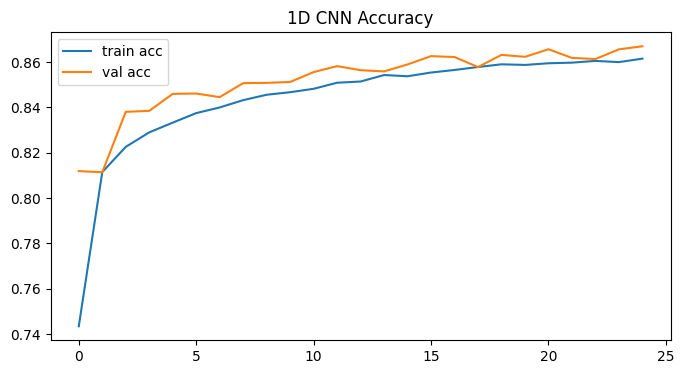

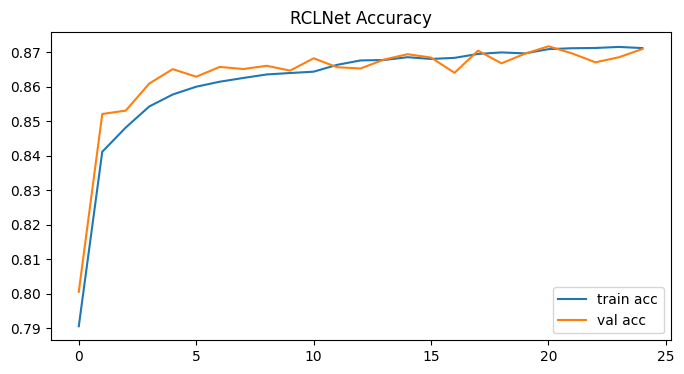

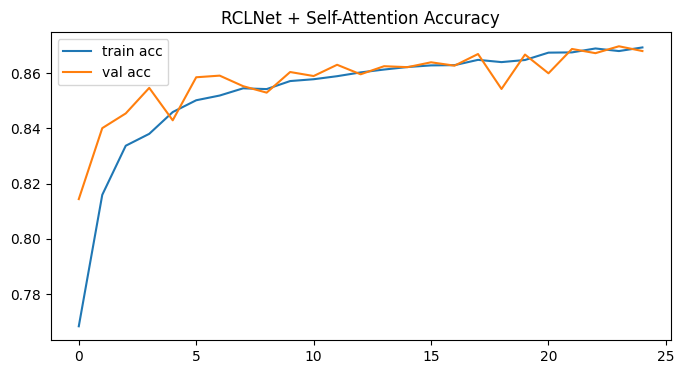

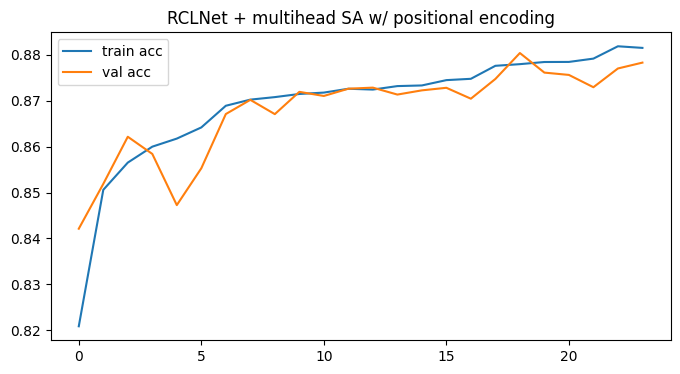

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist, title):
    plt.figure(figsize=(8,4))
    plt.plot(hist.history['accuracy'], label='train acc')
    plt.plot(hist.history['val_accuracy'], label='val acc')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_cnn, "1D CNN Accuracy")
plot_history(history_rcl, "RCLNet Accuracy")
plot_history(history_rcla, "RCLNet + Self-Attention Accuracy")
plot_history(history_pro, "RCLNet + multihead SA w/ positional encoding")

In [ ]:
for i in models_dict.keys():
    models_dict[i].save(f'../artifacts/{i}.keras')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PositionalEncoding1D(nn.Module):
    def __init__(self, maxlen, d_model, device=None):
        super().__init__()
        pe = torch.zeros(maxlen, d_model)
        pos = torch.arange(0, maxlen, dtype=torch.float).unsqueeze(1)
        i = torch.arange(0, d_model, 2, dtype=torch.float)
        denom = torch.pow(10000.0, (i / d_model))
        pe[:, 0::2] = torch.sin(pos / denom)
        if d_model % 2 == 1:
            # odd case
            pe[:, 1::2] = torch.cos(pos / denom[:-1])
        else:
            pe[:, 1::2] = torch.cos(pos / denom)
        pe = pe.unsqueeze(0)  # (1, maxlen, d_model)
        self.register_buffer("pe", pe)

    def forward(self, x):
        # x: (batch, seq_len, d_model)
        seq_len = x.size(1)
        return x + self.pe[:, :seq_len, :]

def conv_residual_block(in_ch, out_ch, kernel=3):
    return nn.Sequential(
        nn.Conv1d(in_ch, out_ch, kernel_size=kernel, padding=kernel//2),
        nn.BatchNorm1d(out_ch),
        nn.ReLU(),
        nn.Conv1d(out_ch, out_ch, kernel_size=kernel, padding=kernel//2),
        nn.BatchNorm1d(out_ch),
    )

class RCLNetAttn(nn.Module):
    def __init__(self, seq_len, in_channels, num_classes, d_model=64, dropout=0.4):
        super().__init__()
        self.seq_len = seq_len
        self.in_ch = in_channels
        self.d_model = d_model

        # First conv residual block (we'll map channels -> d_model)
        self.conv1 = nn.Conv1d(in_channels, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()

        self.res1 = conv_residual_block(64, 64)  # input 64 -> output 64
        self.res2 = conv_residual_block(64, 128) # expand to 128
        # project residual if needed
        self.res_proj = nn.Conv1d(64, 128, kernel_size=1)  

        self.pool = nn.MaxPool1d(kernel_size=2)

        # After convs, we want feature dim = d_model for LSTM/attention
        # We'll transpose channels->features and feed to LSTM (batch, seq, feat)
        self.lstm = nn.LSTM(input_size=128, hidden_size=d_model, num_layers=1,
                            batch_first=True, bidirectional=True)

        # MultiHeadAttention expects embed_dim; since LSTM is bidirectional,
        # embed dim = 2*d_model
        self.mha = nn.MultiheadAttention(embed_dim=2*d_model, num_heads=4, batch_first=True, dropout=0.2)

        self.ln = nn.LayerNorm(2*d_model)
        self.global_avg = nn.AdaptiveAvgPool1d(1)  # to pool over time after permute
        self.fc = nn.Sequential(
            nn.Linear(2*d_model, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, num_classes)
        )

        # positional encoding for sequence (applied after we transpose conv output)
        self.pos_enc = PositionalEncoding1D(maxlen=seq_len, d_model=2*d_model)

    def forward(self, x):
        # x: (batch, seq_len, in_ch)
        # transform to (batch, channels, seq_len) for conv1d
        x = x.permute(0, 2, 1)  # -> (batch, in_ch, seq_len)
        x = self.relu(self.bn1(self.conv1(x)))  # (batch, 64, seq_len)

        residual = x
        x = self.res1(x)  # (batch,64,seq_len)
        # res2 expects 64->128, but we need a shortcut projection
        x2 = self.res2(x)  # (batch,128,seq_len)
        shortcut = self.res_proj(residual)  # (batch,128,seq_len)
        x = F.relu(x2 + shortcut)

        x = self.pool(x)  # (batch, 128, seq_len//2)
        # prepare for LSTM: (batch, seq_len', features)
        x = x.permute(0, 2, 1)  # (batch, seq', 128)

        # LSTM
        x, _ = self.lstm(x)  # (batch, seq', 2*d_model)

        # Add positional encoding (ensure pos enc size matches seq')
        # if seq' < seq_len initial, pos_enc still ok (we used maxlen >= seq_len)
        x = self.pos_enc(x)

        # Multi-head attention (query=key=value = x)
        attn_out, _ = self.mha(x, x, x)
        x = x + attn_out
        x = self.ln(x)  # (batch, seq', 2*d_model)

        # global average pooling over time: convert to (batch, features, seq') then pool
        x = x.permute(0, 2, 1)  # (batch, 2d, seq')
        x = self.global_avg(x).squeeze(-1)  # (batch, 2d)

        out = self.fc(x)  # (batch, num_classes)
        return out

# Example usage:
if __name__ == "__main__":
    seq_len = 45
    in_ch = 1
    num_classes = 6  # adjust
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = RCLNetAttn(seq_len=seq_len, in_channels=in_ch, num_classes=num_classes).to(device)
    print(model)
    # test forward
    sample = torch.randn(8, seq_len, in_ch).to(device)
    out = model(sample)
    print("out shape:", out.shape)  # (8, num_classes)


RCLNetAttn(
  (conv1): Conv1d(1, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (res1): Sequential(
    (0): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (res2): Sequential(
    (0): Conv1d(64, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,))
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (res_proj): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (pool): MaxPool1d(kernel_siz

In [ ]:
from tqdm import tqdm
import numpy as np
import shap

import shap

# Choose 300 random samples (or 500/1000 based on your need)
X_test_sample = shap.sample(X_test, 200, random_state=42)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_sample)

shap.summary_plot(shap_values, X_test_sample, feature_names=X_test.columns)



Computing SHAP values:   4%|▎         | 4/112 [41:35<21:03:15, 701.81s/it]